In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("SIX_VARIABLES.csv")
data.head()

,X1,X2,X3,X4,X5,X6
0,0.49464,0.84748,-0.18870,0.22944,0.31475,0.14086
1,1.29702,0.64319,1.00948,0.55360,2.12976,2.82855
2,-0.47604,0.63695,0.01731,0.56861,1.02323,0.86964
3,2.26378,1.17854,2.66852,2.61012,3.92767,3.30061
4,0.97278,1.24157,-1.10611,-1.69492,-2.00753,-1.50181


In [3]:
data.describe()

,X1,X2,X3,X4,X5,X6
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.184286,0.202391,0.142090,0.053702,-0.064150,0.114520
std,1.387459,1.392293,1.528200,1.540235,1.539805,1.491904
min,-3.481870,-3.177920,-3.210680,-3.710320,-3.763360,-3.133230
25%,-0.530433,-0.690257,-1.008463,-0.838143,-0.996475,-0.938008
50%,0.276930,0.393195,0.040460,0.090735,-0.151670,-0.083210
75%,1.064235,1.061925,1.098740,1.048913,1.043728,1.110262
max,4.008340,4.493240,4.006830,3.793770,3.927670,4.273240


In [4]:
normalizer = StandardScaler()
data_scaled = normalizer.fit_transform(data)

In [5]:
pca = PCA()
pca.fit(data_scaled)
eigenvalues = pca.explained_variance_
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

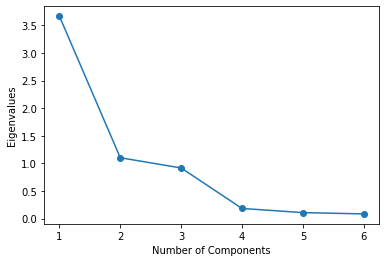

In [6]:
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, '-o')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

In [7]:
eigenvalues

array([3.66599572, 1.10231253, 0.91677737, 0.18325152, 0.10801864,
       0.08425029])

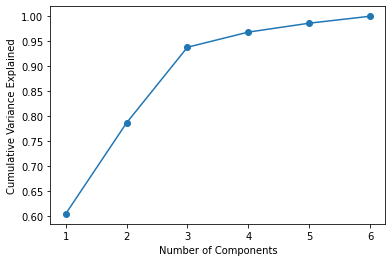

In [8]:
plt.figure
plt.plot(range(1, len(cumulative_variance_explained)+1), cumulative_variance_explained, '-o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [9]:
print(pca.explained_variance_ratio_)

[0.60488929 0.18188157 0.15126827 0.0302365  0.01782308 0.0139013 ]


In [10]:
#!pip install factor_analyzer

In [11]:
from factor_analyzer import FactorAnalyzer

## Factor Analysis with No Rotation

In [12]:
FA = FactorAnalyzer(n_factors = 3, use_smc = True, rotation = None)
common_factors = FA.fit(data_scaled)

In [13]:
columns = ["Factor1","Factor2","Factor3"]
index = ["SumSquared Loadings","Prop Var","Cum Var"]

In [14]:
variance_df = pd.DataFrame(common_factors.get_factor_variance(),
                           columns = columns,
                           index = index)
variance_df

,Factor1,Factor2,Factor3
SumSquared Loadings,3.513462,0.955243,0.822169
Prop Var,0.585577,0.159207,0.137028
Cum Var,0.585577,0.744784,0.881812


In [15]:
loadings = pd.DataFrame(common_factors.loadings_, columns = ["Factor1","Factor2","Factor3"],
                        index = data.columns)
loadings

,Factor1,Factor2,Factor3
X1,0.754413,0.560205,0.206392
X2,0.689907,0.550507,0.092118
X3,0.800428,-0.110269,-0.433047
X4,0.819374,-0.150528,-0.540724
X5,0.738433,-0.347792,0.292411
X6,0.781671,-0.427292,0.453509


## Factor Analysis with Varimax Rotation

In [16]:
FA = FactorAnalyzer(n_factors = 3, use_smc = True, rotation = 'varimax')
common_factors = FA.fit(data_scaled)

In [17]:
variance_df = pd.DataFrame(common_factors.get_factor_variance(),
                           columns = columns,
                           index = index)
variance_df

,Factor1,Factor2,Factor3
SumSquared Loadings,1.804894,1.759949,1.726032
Prop Var,0.300816,0.293325,0.287672
Cum Var,0.300816,0.594140,0.881812


In [18]:
loadings = pd.DataFrame(common_factors.loadings_, columns = columns,
                        index = data.columns)
loadings

,Factor1,Factor2,Factor3
X1,0.186471,0.240682,0.912615
X2,0.237926,0.141489,0.843141
X3,0.839018,0.268286,0.253862
X4,0.941584,0.238376,0.207390
X5,0.286080,0.794917,0.194969
X6,0.202832,0.959848,0.191857


In [19]:
factor_scores = FA.transform(data_scaled)
factor_scores = pd.DataFrame(factor_scores, columns = columns)
factor_scores.head()

,Factor1,Factor2,Factor3
0,0.037051,-0.037844,0.309890
1,-0.169629,1.854914,0.333625
2,0.243318,0.640874,-0.475446
3,1.169692,1.754618,0.797204
4,-1.148624,-1.092170,1.077627


## Factor Analysis Using Oblique Rotation

In [20]:
FA = FactorAnalyzer(n_factors = 3, use_smc = True, rotation = 'promax')
common_factors = FA.fit(data_scaled)

In [21]:
variance_df = pd.DataFrame(common_factors.get_factor_variance(),
                           columns = columns,
                           index = index)
variance_df

,Factor1,Factor2,Factor3
SumSquared Loadings,1.826070,1.747453,1.703311
Prop Var,0.304345,0.291242,0.283885
Cum Var,0.304345,0.595587,0.879472


In [22]:
loadings = pd.DataFrame(common_factors.loadings_, columns = columns,
                        index = data.columns)
loadings

,Factor1,Factor2,Factor3
X1,-0.052450,0.062848,0.958242
X2,0.052751,-0.055207,0.884492
X3,0.877435,0.033880,0.040175
X4,1.019813,-0.021353,-0.032274
X5,0.081030,0.817355,0.007930
X6,-0.063713,1.034786,-0.006173
